<a href="https://colab.research.google.com/github/branjbar/nlp-bert-family/blob/master/transformers/bert_embedding_sentence_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%%capture
!pip install -U sentence-transformers

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer

100%|██████████| 405M/405M [00:19<00:00, 20.3MB/s]


In [ ]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [7]:
sentences = ['I wanna carry out a test', 'I wanna do an expertiment', "I wanna eat hotdog","philosophy is cool", 'I wanna do a sample check', 'I wanna escape from reality', 'I wanna escape from the world','I wanna fire everyone','I am hungry and I want to have lunch', 'cannot handle my job any more']
sentence_embeddings = model.encode(sentences)

In [8]:
len(sentence_embeddings)

10

In [9]:
sentence_embeddings[0].shape

(768,)

In [11]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sentence_embeddings)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['x', 'y'])

In [12]:
principalDf["text"] = sentences
principalDf

,x,y,text
0,-2.958663,-7.113277,I wanna carry out a test
1,-0.044381,-5.091541,I wanna do an expertiment
2,11.621966,2.566060,I wanna eat hotdog
3,2.999281,-6.504743,philosophy is cool
4,-1.511866,-6.357656,I wanna do a sample check
5,-7.657270,1.950464,I wanna escape from reality
6,-8.007800,3.136829,I wanna escape from the world
7,1.420645,4.524072,I wanna fire everyone
8,8.670896,3.851752,I am hungry and I want to have lunch
9,-4.532808,9.038041,cannot handle my job any more


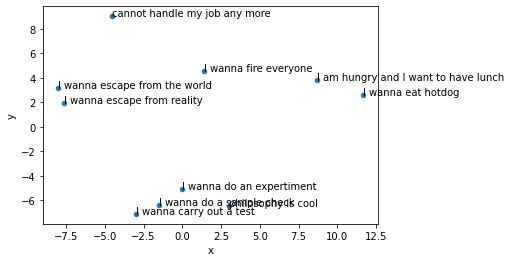

In [13]:
ax = principalDf.plot.scatter("x","y")
for i, txt in enumerate(principalDf.text):
    ax.annotate(txt, (principalDf.x.iat[i],principalDf.y.iat[i]))